In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define the continuous-time system matrices
 
A=np.matrix([[0, 1],[- 0.1, -0.05]])
B=np.matrix([[0],[1]])
C=np.matrix([[1, 0]])

In [6]:
#define the number of time-samples used for the simulation and the sampling time for the discretization
time=300
sampling=0.5

In [4]:
#define an initial state for simulation
x0=np.random.rand(2,1)

In [7]:
#define an input sequence for the simulation
#input_seq=np.random.rand(time,1)
input_seq=np.ones(time)
#plt.plot(input_sequence)

the following function simulates the state-space model using the backward Euler method

the input parameters are:

   -- A,B,C              - continuous time system matrices 
   
   -- initial_state      - the initial state of the system 
   
   -- time_steps         - the total number of simulation time steps 
   
   -- sampling_perios    - the sampling period for the backward Euler discretization 
   
this function returns the state sequence and the output sequence

they are stored in the vectors Xd and Yd respectively

In [8]:
def simulate(A,B,C,initial_state,input_sequence, time_steps,sampling_period):
    from numpy.linalg import inv
    I=np.identity(A.shape[0]) # this is an identity matrix
    Ad=inv(I-sampling_period*A)
    Bd=Ad*sampling_period*B
    Xd=np.zeros(shape=(A.shape[0],time_steps+1))
    Yd=np.zeros(shape=(C.shape[0],time_steps+1))
     
    for i in range(0,time_steps):
        if i==0:
            Xd[:,[i]]=initial_state
            Yd[:,[i]]=C*initial_state
            x=Ad*initial_state+Bd*input_sequence[i]
        else:
            Xd[:,[i]]=x
            Yd[:,[i]]=C*x
            x=Ad*x+Bd*input_sequence[i]
    Xd[:,[-1]]=x
    Yd[:,[-1]]=C*x
    return Xd, Yd

In [9]:
state,output=simulate(A,B,C,x0,input_seq, time ,sampling)  

Text(0.5, 1.0, 'System step response')

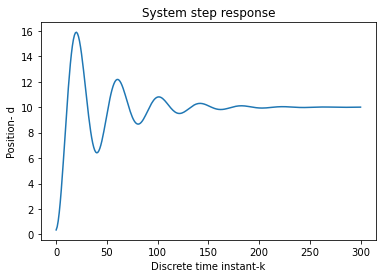

In [10]:
plt.plot(output[0,:])
plt.xlabel('Discrete time instant-k')
plt.ylabel('Position- d')
plt.title('System step response')